<a href="https://colab.research.google.com/github/holiz12/Titanic-Machine-Learning-from-Disaster/blob/master/Titanic_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic Survival Prediction Using Machine Learning

A predictive model was built to answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


In [2]:
#Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
#Load the data fofromr github repository

url = 'https://raw.githubusercontent.com/holiz12/Titanic-Machine-Learning-from-Disaster/master/titanic/test.csv'
df1 = pd.read_csv(url)

#Load the dataset

titanic = sns.load_dataset('titanic')


In [10]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [11]:
#Evalute the statistical value
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#Obtain the number of survivors
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

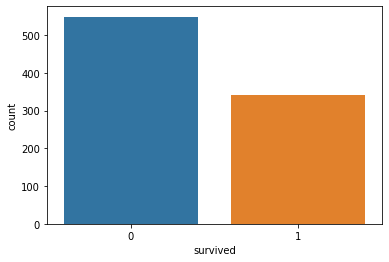

In [15]:
#Visualise the number of survivors
sns.countplot(titanic['survived'])

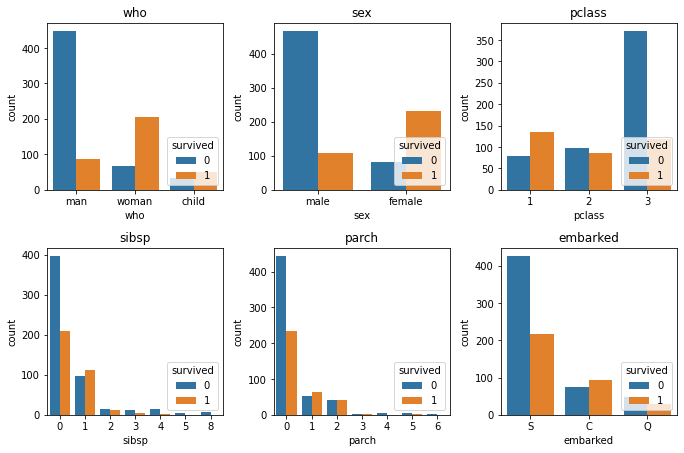

In [27]:
#Visulize the count for import columns such as who, sex, class, sibsp, parch and embarked
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']
n_rows = 2 
n_cols = 3

#The subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols *3.2, n_rows * 3.2) )
for r in range(0, n_rows):
  for c in range(0, n_cols):

    i=r*n_cols + c #index to go through the number of columns
    ax = axs[r][c]
    sns.countplot(titanic[cols[i]], hue=titanic['survived'], ax=ax)
    ax.set_title(cols[i])
    ax.legend(title='survived', loc = 'lowerupper right')

plt.tight_layout()


In [33]:
#The survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [31]:
#Survival rate by sex and class
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


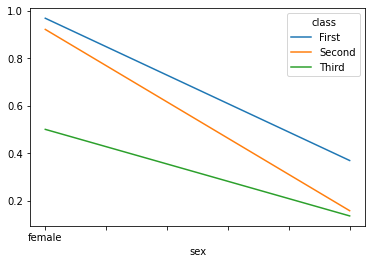

In [38]:
#Visually survival rate by sex and class
titanic.pivot_table('survived', index='sex', columns='class').plot()

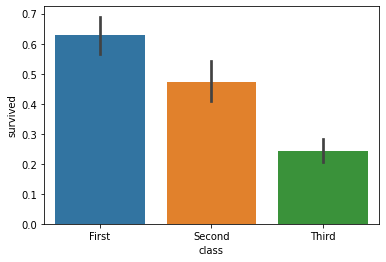

In [40]:
#Plot tge survical rate of each class
sns.barplot(x='class', y='survived', data = titanic)

In [43]:
#look at survival rate by sex, age and class
age = pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

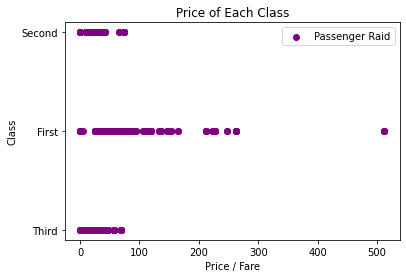

In [48]:
#Plot the prices paid of each class
plt.scatter(titanic['fare'], titanic['class'], color='purple', label='Passenger Raid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()